Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
!unzip /content/drive/MyDrive/Classroom/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [1]:
import os
import tensorflow as tf
import keras
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

Set directory

In [ ]:
train_dir= '/content/Dataset/Train'
test_dir= '/content/Dataset/Test'
validation_dir= '/content/Dataset/Validation'

Load Data

In [ ]:
train_image_gen= ImageDataGenerator(rescale=1./255)
test_image_gen= ImageDataGenerator(rescale=1./255)
validation_image_gen= ImageDataGenerator(rescale=1./255)

Preprocess

In [ ]:
train_data= train_image_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode= 'categorical'
)

test_data= test_image_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode= 'categorical'
    shuffle=False
)

validation_data= validation_image_gen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode= 'categorical'
)

Found 140002 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.


Visualize

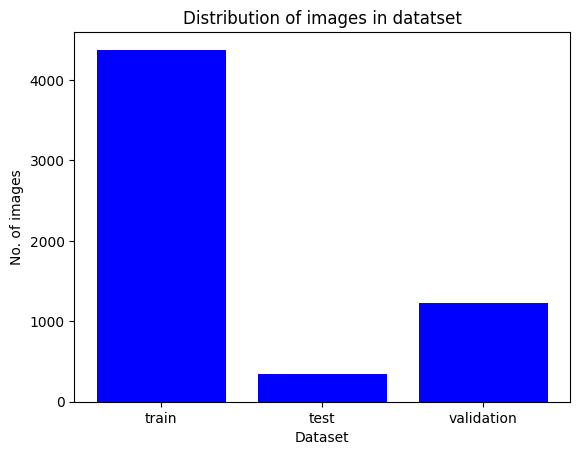

In [ ]:
train_size= len(train_data)
test_size= len(test_data)
validation_size= len(validation_data)

x= ['train', 'test', 'validation']
y= [train_size, test_size, validation_size]

plt.bar(x, y, color='blue')
plt.xlabel("Dataset")
plt.ylabel("No. of images")
plt.title("Distribution of images in datatset")
plt.show()

Building CNN

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,(3,3), activation='relu', input_shape= (128, 128, 3)))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(64,(3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,605,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,699,074 (6.48 MB)

 Trainable params: 1,699,074 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history= cnn_model.fit(train_data, epochs= 12, validation_data=validation_data)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 249s 55ms/step - accuracy: 0.8099 - loss: 0.4014 - val_accuracy: 0.9051 - val_loss: 0.2243
Epoch 2/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 204s 47ms/step - accuracy: 0.9383 - loss: 0.1534 - val_accuracy: 0.9258 - val_loss: 0.1782
Epoch 3/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 254s 45ms/step - accuracy: 0.9497 - loss: 0.1243 - val_accuracy: 0.9356 - val_loss: 0.1612
Epoch 4/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 203s 45ms/step - accuracy: 0.9580 - loss: 0.1034 - val_accuracy: 0.9344 - val_loss: 0.1613
Epoch 5/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 190s 43ms/step - accuracy: 0.9636 - loss: 0.0913 - val_accuracy: 0.9392 - val_loss: 0.1578
Epoch 6/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 193s 44ms/step - accuracy: 0.9676 - loss: 0.0789 - val_accuracy: 0.9456 - val_loss: 0.1485
Epoch 7/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 198s 43ms/step - accuracy: 0.9712 - loss: 0.0706 - val_accuracy: 0.9407 - val_loss: 0.1652
Epoch 8/12
4376/4376 ━━━━━━━━━━━━━━━━━━━━ 207s 47ms/step - accuracy: 0.9756 - lo

In [ ]:
loss, accuracy= cnn_model.evaluate(test_data)
print("Test Acuuracy is :")
print(accuracy)
print("Test Loss is :")
print(loss)

341/341 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8814 - loss: 0.3846
Test Acuuracy is :
0.8839981555938721
Test Loss is :
0.38446903228759766


Graphs

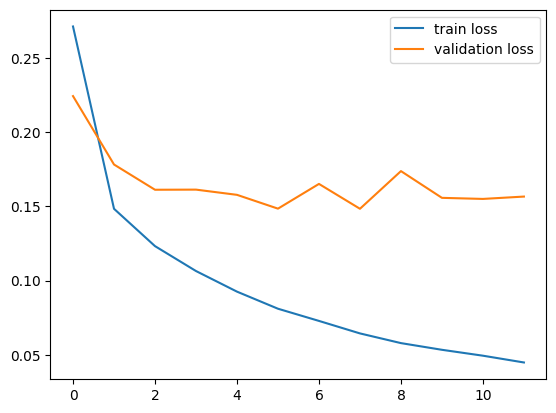

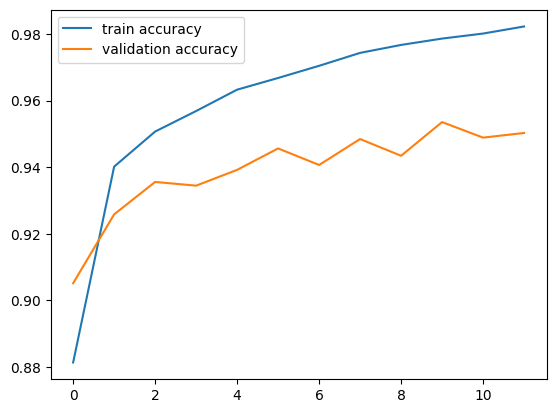

In [ ]:
plt.plot(history.history['loss'], label='train loss' )
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy' )
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

341/341 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


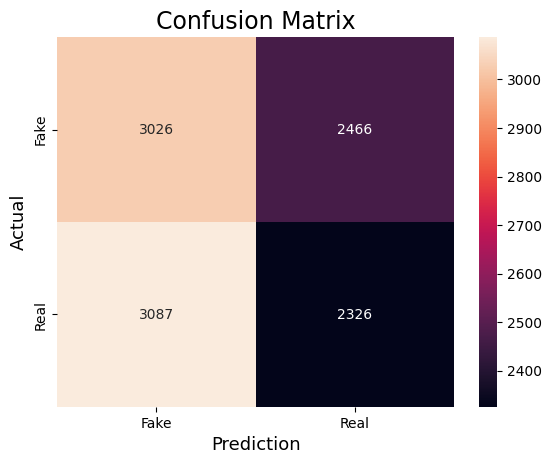

In [ ]:
predictions= cnn_model.predict(test_data)
predicted= np.argmax(predictions, axis=1)
actual= test_data.classes
cm = confusion_matrix(actual, predicted)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Fake','Real'],
            yticklabels=['Fake','Real'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52      5492
           1       0.49      0.43      0.46      5413

    accuracy                           0.49     10905
   macro avg       0.49      0.49      0.49     10905
weighted avg       0.49      0.49      0.49     10905



Saving weights of trained model


In [ ]:
cnn_model.save_weights('/content/weights.weights.h5')


Predict!!

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.models import load_model

# 1. Recreate the model architecture
model =  Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape= (128, 128, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 2. Load the saved model weights
model.load_weights('/content/weights.weights.h5')

# 3. Upload an image for prediction
uploaded = files.upload()

# 4. Preprocess the image
for filename in uploaded.keys():
    img_path = filename

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image if necessary

# 5. Predict the class of the image
prediction = model.predict(img_array)

# 6. Interpret and print the prediction
if prediction[0][0] < 0.5:
    print(f"The image is predicted to be Fake with a probability of {1 - prediction[0][0]:.2f}")
else:
    print(f"The image is predicted to be Real with a probability of {prediction[0][0]:.2f}")


Saving deepfake2.jpg to deepfake2 (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
The image is predicted to be Real with a probability of 0.90
